In [1]:
# ======================================================================================
# Notebook setup
# 
# Run this cell before all others to make sure that the Jupyter notebook works properly
# ======================================================================================

# Automatically reload all imported modules
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

figsize = (20, 4.5)

# Introduction to Neural Networks

## Neural Networks

**Neural Networks are a type of ML model**

...Which follows a biology-inspired paradigm

* The idea is that the our brain achieves impressive results
* ...By relying on _many_ (relatively simple) _connected neurons_

In fact, the first NNs were born as simplified biological models

**Over time, the connection with biology has faded**

Today, NNs are best understood as parameterized functions:

$$
f(x, w)
$$

* Where $x$ is the input vector
* ...And $w$ is the parameter (weight) vector

The abstract definition is in fact close to that of Linear Regression

## Neural Networks

**The function $f$ is made of multiple computation units called _neurons_**

...That are connected via a variety of schemas

<center>
<img src="assets/ann.png" width=60%/>
</center>

A popular schema (in the figure) consists in arranging neurons in _layers_

* Neurons in the same layer are not connected to each other
* Neurons in adjacent layers are fully connected

## Neural Networks

**The function $f$ is made of multiple computation units called _neurons_**

...That are connected via a variety of schemas

<center>
<img src="assets/ann.png" width=60%/>
</center>

* The _input_ is often treated as a first layer
* The final layer returns the _output_
* Intermediate layer are referred to as _hidden_

## Neural Networks

**The function $f$ is made of multiple computation units called _neurons_**

...That are connected via a variety of schemas

<center>
<img src="assets/ann.png" width=60%/>
</center>

The resulting architecture is known as _feed-forward, fully connected NN_

* ...Or sometimes just as _multilayer perceptron_
* There are many more connection schemas
* ...But we will (mostly) stick to this one

## Neurons

**Each neuron is itself a (simple) parameterized function**

In particular, most types of neurons have the form:

$$
h(w^T x + \theta)
$$

**First the neuron computes $w^Tx + \theta$**

* This is just a weighted sum of its input (plus an offset)
* It's the same operation we do in Linear Regression

**Then, the neuron applies an activation function $h$**

* This is univariate, scalar fuction (i.e. $h: \mathbb{R} \to \mathbb{R})$
* ...And it's always monotone non-decreasing

Using a linear activation function (i.e. $h(y) =y$) is a viable option

## Neurons

**However, activation functions are typically non-linear**

Notable examples include

<center><img src="assets/act_fun.png" width="700px"/></center>

* A _sigmoid_ is an example of a bounded activation function (in $[0, 1]$)
* A _Rectifier Linear Unit_ is a piecewise linear activation function

**Both provide a numerical characterization of the neuron state:**

* If $w^Tx + \theta \leq 0$, the neuron is _inactive_ (the output is 0 or close)
* If $w^Tx + \theta > 0$, the neuron is _active_ (the output is positive)

## NNs and Activation Functions

**The properties of a MLP depend on the activation functions and layers**

<center>
<img src="assets/ann.png" width=60%/>
</center>

Let's start by discussing the activation function for the _output layer_:

* For _regression tasks_ we typically choose a linear activation function
* ...Since that leaves the largest possible variability range for the output

## NNs and Activation Functions

**The properties of a MLP depend on the activation functions and layers**

<center>
<img src="assets/ann.png" width=60%/>
</center>

Let's start by discussing the activation function for the _output layer_:

* For _classification tasks_ we typically choose a sigmoid (logistic function)
* ...Since that allow us to interpret outputs as probability values

## NNs and Activation Functions

**The properties of a MLP depend on the activation functions and layers**

<center>
<img src="assets/ann.png" width=30%/>
</center>

For _classification tasks_ with multiple classes

* We use one output neuron _per class_, with a sigmoid output
* ...Then we normalize the output so that they sum up to one
* This operation is called a _softmax_

Formally, this is defined as:

$$
y_k(z) = \frac{e^{z_k}}{\sum_{k = 1}^{n_k} e^{x_k}}
$$

## NNs and Activation Functions

**The properties of a MLP depend on the activation functions and layers**

<center>
<img src="assets/ann.png" width=60%/>
</center>

A MLP with no hidden layer is _just a linear model_!

* For regression, we get Linear Regression
* For classification, we get Logistic Regression
* ...The softmax "trick" is in fact borrowed from Logistic Regression

## NNs and Activation Functions

**The properties of a MLP depend on the activation functions and layers**

<center>
<img src="assets/ann.png" width=60%/>
</center>

For the hidden layers, we always use (at least some) _non-linear_ functions

* In fact, if we used only linear activation functions
* ...We would get a linear model again

## Universal Approximation

**There is an important result about hidden layers and activation functions**

* If a NN is _sufficiently large_
* ...And has _at least one hidden layer_
* ...With a _non-linear_ activation function

Then the network can approximate _any function_ with _arbitrary precision_

**In other words, NNs are _universal approximators_**

This is a very powerful result!

* No matter what input-output relation we need to learn
* ...With a large-enough NN and we have a good chance of succeeding

**Just how big does the network need to be?**

* It depends on the complexity of the true function to be learned
* ...And on the structure of the network

## Shallow vs Deep NN

**In particular, it depends on the _number layers_**

Assuming that the ground truth function is challenging:

* If we use _a single hidden layer_, then that layer may need to be very large
* ...But if we use _many hidden layers_, they can be much smaller

We say that:

* A network is _shallow_ if it has a single layer
* A network is _deep_ if if has multiple layers

**Deep learning is just NNs with multiple hidden layers**

* In this lecture we will focus on shallow networks
* We will discuss deep networks in the next lecture

## A Practical Example

**We will try to learn an NN for our housing dataset**

Let's start by loading the data

In [2]:
fname = os.path.join('..', 'data', 'real_estate.csv')
data = pd.read_csv(fname, sep=',')
in_cols = [c for c in data.columns if c != 'price per area']
X = data[in_cols]
y = np.log(data[['price per area']])
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.34, random_state=42)

data.head()

,house age,dist to MRT,#stores,latitude,longitude,price per area
0,14.8,393.2606,6,24.96172,121.53812,7.6
1,17.4,6488.0210,1,24.95719,121.47353,11.2
2,16.0,4066.5870,0,24.94297,121.50342,11.6
3,30.9,6396.2830,1,24.94375,121.47883,12.2
4,16.5,4082.0150,0,24.94155,121.50381,12.8


* Again, the first 4 colums are our input
* ...And our goal is to estimate $\log(\text{price per area})$

## Building a Network in keras/tensorflow

**We will rely on [tensorflow](https://www.tensorflow.org/) and [keras](https://keras.io/) to deal with Neural Networks**

* Tensorflow is a library for tensor computations developed by Google
* ...And Keras is a Python package to build and train NNs

For some years, Keras has been integrated in tensorflow

**When working with NNs, our model does not have a fixed structure**

...Instead, we need to decide how we want to build our NN

* Keras provides multiple approaches for constructing a NN model
* The simplest one is the so-called _Sequential API_
* ...Which requires to start by building a `Sequential` object

In [3]:
from tensorflow import keras

nn = keras.Sequential()

/Users/michelelombardi/Library/Caches/pypoetry/virtualenvs/lectures-iFacsl1s-py3.11/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/michelelombardi/Library/Caches/pypoetry/virtualenvs/lectures-iFacsl1s-py3.11/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
/Users/michelelombardi/Library/Caches/pypoetry/virtualenvs/lectures-iFacsl1s-py3.11/lib/python3.11/site-packages/google/protobuf/runtime_version.py:98: UserWarning: Proto

## Building a Network in keras/tensorflow

**Then we build a number of "layer" objects**

...And we add then to the model

In [4]:
from keras.layers import Dense, Input

input_shape = (len(in_cols),)
nn.add(Input(input_shape))
nn.add(Dense(16, activation='relu'))
nn.add(Dense(1, activation='linear'))

* The first layer we add will be the one accepting the input
  - ...And for this reason we specify the size of the expected input vector
* The last layer we add will be the one providing the output

**We have just built a shallow network**

* The hidden layer has 16 neurons and a "ReLU" activation function
* The output layer contains a single, linear, neuron

## Plotting a Model

**We can even plot the model structure**

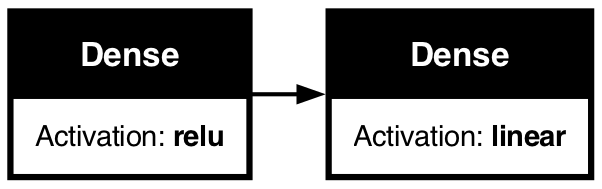

In [5]:
keras.utils.plot_model(nn, rankdir='LR', show_layer_activations=True, dpi=150)

* Every box represents a layer
* The first one is the input (which was added automatically by keras)
* The second is the ReLU layer that we explicitly added
* The last is the ouput layer

**Note:** you'll need to download [the graphviz tool for this](https://graphviz.org/download/)

## Training a Neural Network

**In principle, training a NN is the same as training a linear model**

I.e. given a loss function $L(\hat{y}, f(\hat{x}, w))$ we need to solve:

$$
\arg\min_{w} L(\hat{y}, f(\hat{x}, w))
$$

* Where $\hat{x}$ is the training set input

For example, for an MSE loss we get:

$$
\arg\min_{w} \|f(\hat{x}, w) - \hat{y}\|_2^2
$$

* I.e. we want to tune the parmaters $w$
* ...So that our predictions $f(\hat{x}, y)$ are close to the targets $\hat{y}$

**The main difference is that our function $f$ is now non-linear**

## Training a Neural Network

**For this reason, NNs are usually trained via _gradient descent_:**

Starting from a parameter vector $w_0$, we repeat:

$$
w_{k+1} = w_{k} - \eta_k \nabla_{w} L(\hat{y}, f(\hat{x}, w_k))
$$

* I.e. we adjust the current parameter vector $w_k$
* ...In the direction _opposite_ to the loss gradient $\nabla_{w} L(\hat{y}, f(\hat{x}, w_k))$

By doing this, we (roughly) cause the loss function to decrease

**There are several algorithms based on gradient descent**

E.g. Gradient Descent, Adagrad, Adadelta, RMS Prop, Adam...

* They handle differently the step size $\eta_k$
* ...And sometimes they change other aspects of the process

## Training a Neural Network

**There is one specific "trick" that all approaches rely on**

Rather than using all examples to compute the gradient:

$$
w_{k+1} = w_{k} - \eta_k \nabla_{w} L(\hat{y}, f(\hat{x}, w_k))
$$

...They instead randomly sample a subset $(\hat{x}^\prime, \hat{y}^\prime) \sim (\hat{x}, \hat{y})$:

$$
w_{k+1} = w_{k} - \eta_k \nabla_{w} L(\hat{y}^\prime, f(\hat{x}^\prime, w_k))
$$

This approach is known as _Stochastic Gradient Descent_

* Typically examples are first shuffled
* Then partitioned in small groups called _mini-batches_
* Then we run an gradient descent iteration over each mini-batch

Once all examples have been considered, we have completed an _epoch_

## Standardizing the Data

**Since we are using gradient descent**

...It's in general a good idea to _normalize/standardiza the data_

* Gradient descent methods are affected by their startin point (i.e. $w_0$)
* NN training libraries are very good at choosing those
* ...Provided that all inputs and output are reasonably close to 0

In [6]:
x_scaler, y_scaler = StandardScaler(), StandardScaler()
X_tr_s = x_scaler.fit_transform(X_tr)
X_ts_s = x_scaler.transform(X_ts)
y_tr_s = y_scaler.fit_transform(y_tr)
y_ts_s = y_scaler.transform(y_ts)

Skipping this step can makes training ineffective and/or unrealiable

## Training a Neural Network in Keras

**Training a Neural Network in Keras requires two steps**

* First, se setup the training problem by calling the `compile` method
* Then, we start training by calling the `fit` method

In [7]:
nn.compile(optimizer='adam', loss='mse')
history = nn.fit(X_tr_s, y_tr_s, batch_size=32, epochs=600)

Epoch 1/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9715  
Epoch 2/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8539
Epoch 3/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7637
Epoch 4/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.6843
Epoch 5/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6234
Epoch 6/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5842
Epoch 7/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5464
Epoch 8/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.5159
Epoch 9/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4946
Epoch 10/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4764
Epoch 11/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step - loss: 0.4598
Epoch 12/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.4463
Epoch 13/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.4335
Epoch 14/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.4219
Epoch 15/600
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - loss: 0.4112
Epoch 16/600
9/9 ━

## Training a Neural Network in Keras

**Let's plot the loss behavior over the epochs**

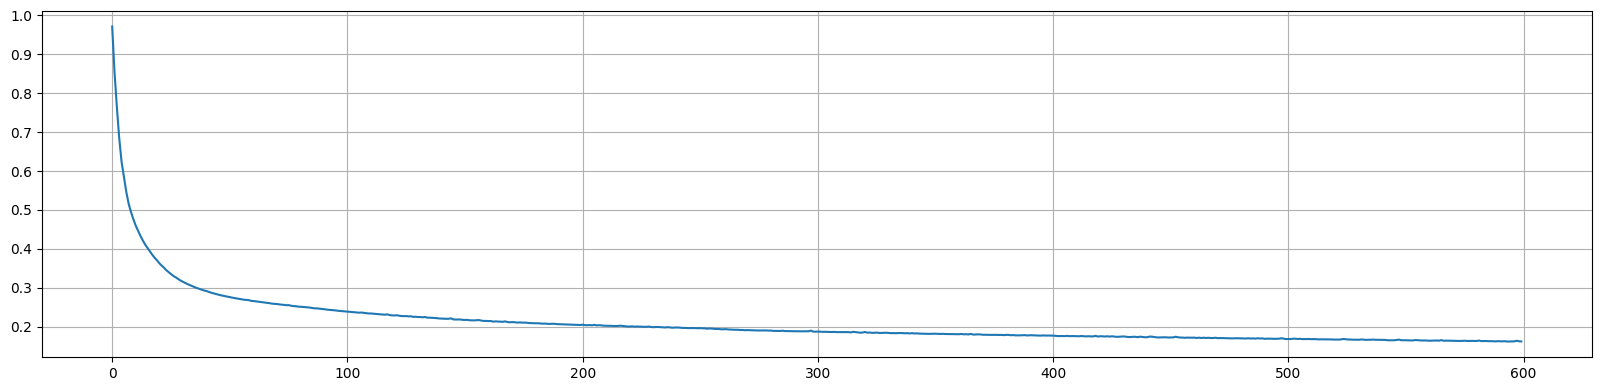

In [8]:
loss_history = pd.Series(name='loss', data=history.history['loss'])
loss_history.plot(figsize=figsize, grid=':');

The flat behavior towards the end is due to the algorithm approaching convergence

## Model Evaluation

**NNs can be evaluated like any other ML model**

Here are the results on the training set

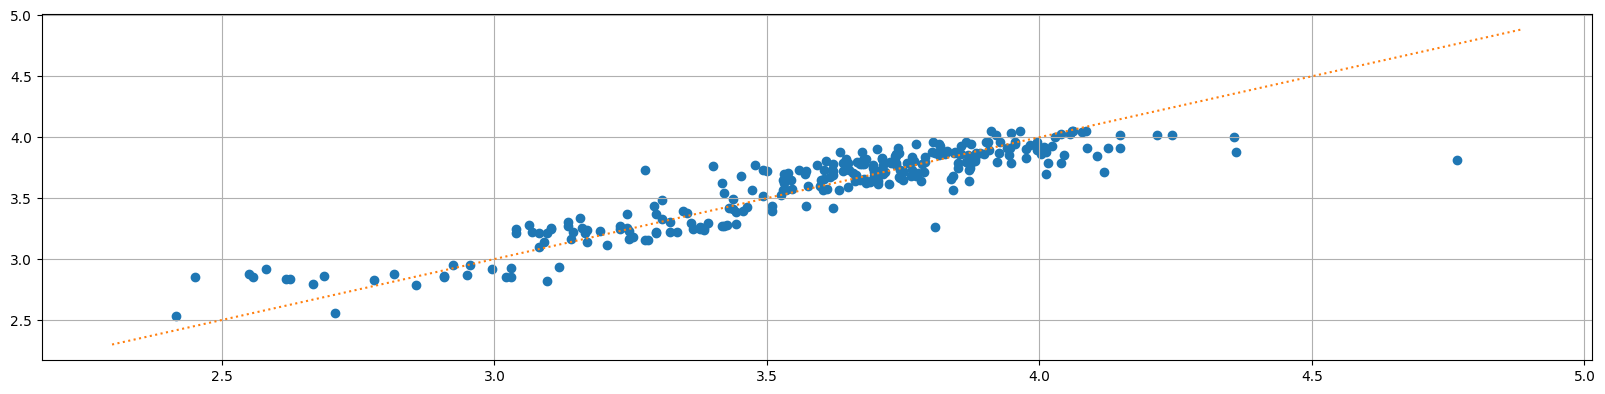

r2 score: 0.839


In [9]:
nn_pred_tr = y_scaler.inverse_transform(nn.predict(X_tr_s, verbose=0))
plt.figure(figsize=figsize)
plt.scatter(x=y_tr, y=nn_pred_tr)
l, u = min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1])
plt.plot([l, u], [l, u], linestyle=':', color='tab:orange')
plt.grid(); plt.show() 
print(f'r2 score: {r2_score(y_tr, nn_pred_tr):.3f}')

## Model Evaluation

**NNs can be evaluated like any other ML model**

...And those on the test set

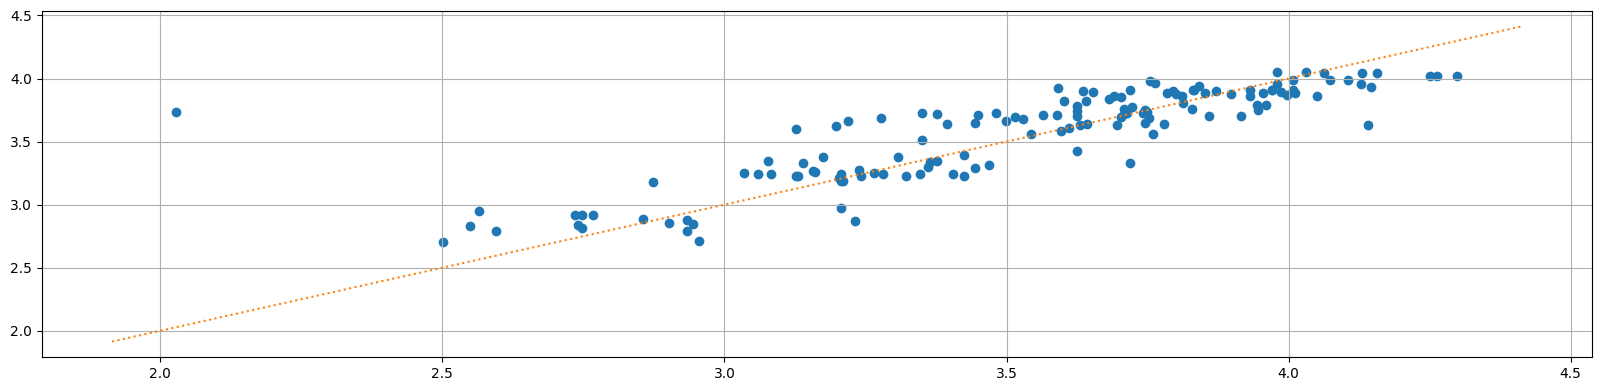

r2 score: 0.713


In [10]:
nn_pred_ts = y_scaler.inverse_transform(nn.predict(X_ts_s, verbose=0))
plt.figure(figsize=figsize)
plt.scatter(x=y_ts, y=nn_pred_ts)
l, u = min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1])
plt.plot([l, u], [l, u], linestyle=':', color='tab:orange')
plt.grid(); plt.show()
print(f'r2 score: {r2_score(y_ts, nn_pred_ts):.3f}')

## NN Output Surface

**It's interesting to see how the NN output changes depending on the input**

On this purpose, let's build a special dataset

* We will take one example as a reference
* Then build similar example by chaning a value of a single attribute

In [11]:
x_ref, a_ref = X_tr.iloc[120], 'dist to MRT'
a_vals = np.linspace(X_tr[a_ref].min(), X_tr[a_ref].max(), 1000)

x_sensitivity = pd.DataFrame(index=np.arange(len(a_vals)), columns=X_tr.columns)
for c in X_tr.columns:
    if c == a_ref: x_sensitivity[c] = a_vals
    else: x_sensitivity[c] = x_ref[c]
x_sensitivity.head()

,house age,dist to MRT,#stores,latitude,longitude
0,41.3,23.382840,6.0,24.96674,121.54039
1,41.3,29.853949,6.0,24.96674,121.54039
2,41.3,36.325059,6.0,24.96674,121.54039
3,41.3,42.796168,6.0,24.96674,121.54039
4,41.3,49.267277,6.0,24.96674,121.54039


## NN Output Surface

**Now, let's see how our NN response to changes in the attribute**

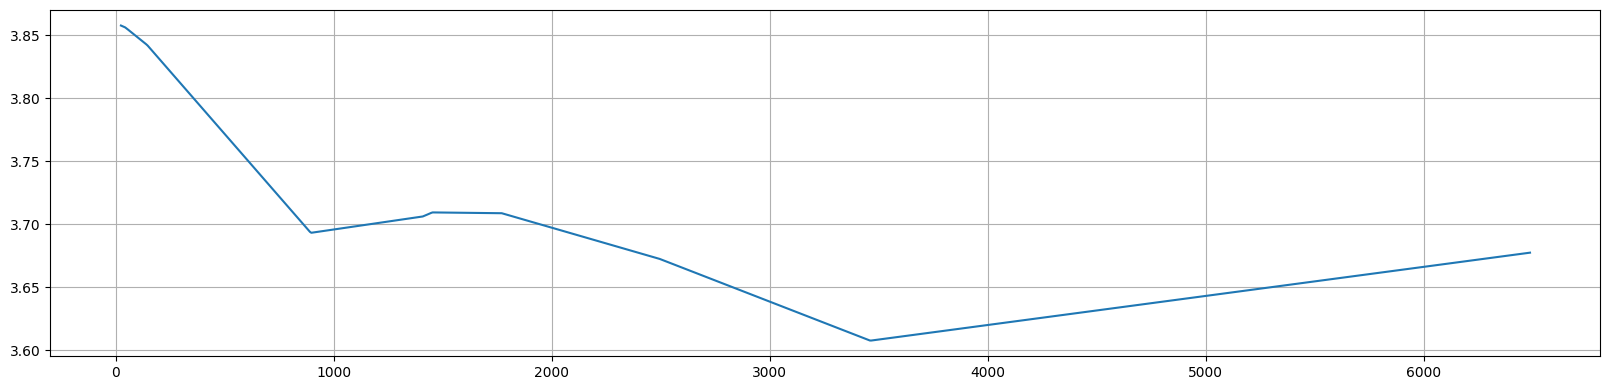

In [12]:
nn_pred_s = y_scaler.inverse_transform(nn.predict(x_scaler.transform(x_sensitivity), verbose=0))
pred_sensitivity = pd.Series(index=a_vals, data=nn_pred_s.ravel())
pred_sensitivity.plot(figsize=figsize, grid=':');

* The curve is rather smooth (despite the use of piecewise linear activations)
* Variations are relatively slow

## NN vs RF Output Surface

**For comparison, let's see the same response for a RF model**

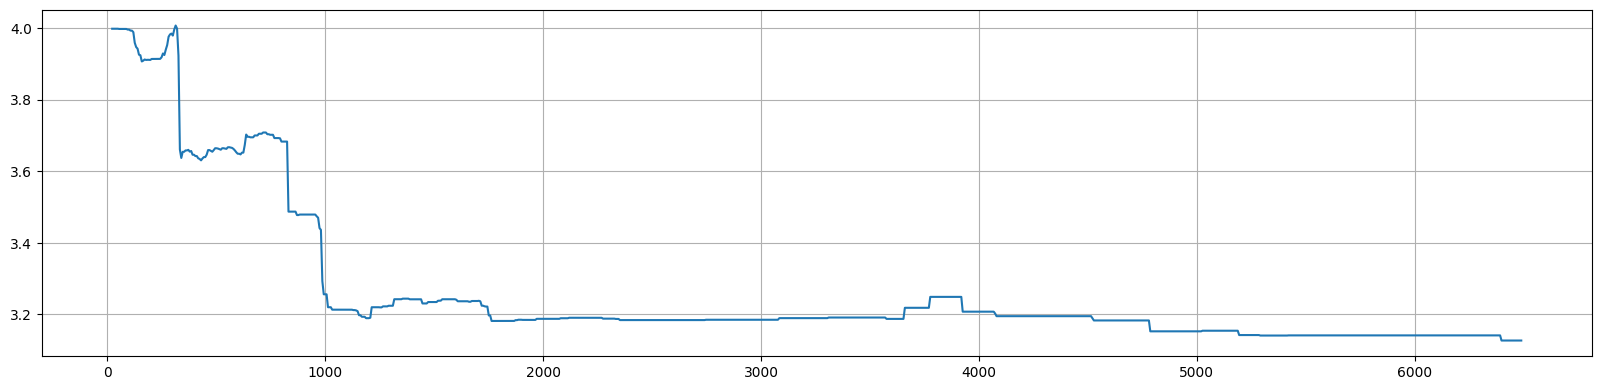

In [13]:
rf = RandomForestRegressor()
rf.fit(X_tr, y_tr.values.ravel())
rf_pred_s = rf.predict(x_sensitivity)
pred_sensitivity = pd.Series(index=a_vals, data=rf_pred_s.ravel())
pred_sensitivity.plot(figsize=figsize, grid=':');

* The curve is not smooth at all
* Variations can be very quick

# Neural Networks and Classification

## Loading and Preprocessing Data

**As we mentioned, Neural network can be used for classification**

We will see a practical example on the weather dataset

In [14]:
fname2 = os.path.join('..', 'data', 'weather.csv')
data2 = pd.read_csv(fname2, sep=',')
data2['windy'] = data2['windy'].astype('category').cat.codes
data2['play'] = data2['play'].astype('category').cat.codes
data2 = pd.get_dummies(data2, columns=['outlook'])

out_col2 = 'play'
in_cols2 = [c for c in data2.columns if c != out_col2]

X2 = data2[in_cols2].astype('float64')
y2 = data2[[out_col2]].astype('float64')

* We preprocess the data the same way we did for Linear regression
* We convert all features to a floating point type
* ...Since the tensorflow library expects that

## Loading and Preprocessing Data

**Train-test spliting and standardization are also as in Linear Regression**

In [15]:
X_tr2, X_ts2, y_tr2, y_ts2 = train_test_split(X2, y2, test_size=0.34, random_state=42)

num_cols2 = ['temperature', 'humidity']
x_scaler = StandardScaler()
X_tr2[num_cols2] = x_scaler.fit_transform(X_tr2[num_cols2])
X_ts2[num_cols2] = x_scaler.transform(X_ts2[num_cols2])
X_tr2.head()

,temperature,humidity,windy,outlook_overcast,outlook_rainy,outlook_sunny
8,-0.610786,-1.133519,0.0,0.0,0.0,1.0
2,1.871762,0.310965,0.0,1.0,0.0,0.0
1,1.339788,0.672087,1.0,0.0,0.0,1.0
13,-0.256136,0.762367,1.0,0.0,1.0,0.0
4,-0.788110,-0.230716,0.0,0.0,1.0,0.0


* There is no need to standardize/normalize 0-1 data
* ...Since with NNs we need normalization only to support gradient descent

## Building a Model

**We need to build the network with a different output layer**

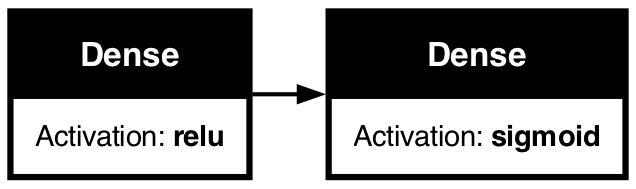

In [16]:
input_shape2 = (len(in_cols2),)

nn2 = keras.Sequential()
nn2.add(Input(input_shape2))
nn2.add(Dense(16, activation='relu'))
nn2.add(Dense(1, activation='sigmoid'))
keras.utils.plot_model(nn2, rankdir='LR', show_layer_activations=True, dpi=150)

* If we have two classes, we use a sigmoid
* If we have more, we introduce one neuron per class
* ...And we pass `'sigmoid'` for the `activation` parameter

## Training a Model

**At training time, we need to use a different loss function**

* We use `'binary_crossentropy'` with two classes
* ...And `'categorical_crossentropy'` with more classes

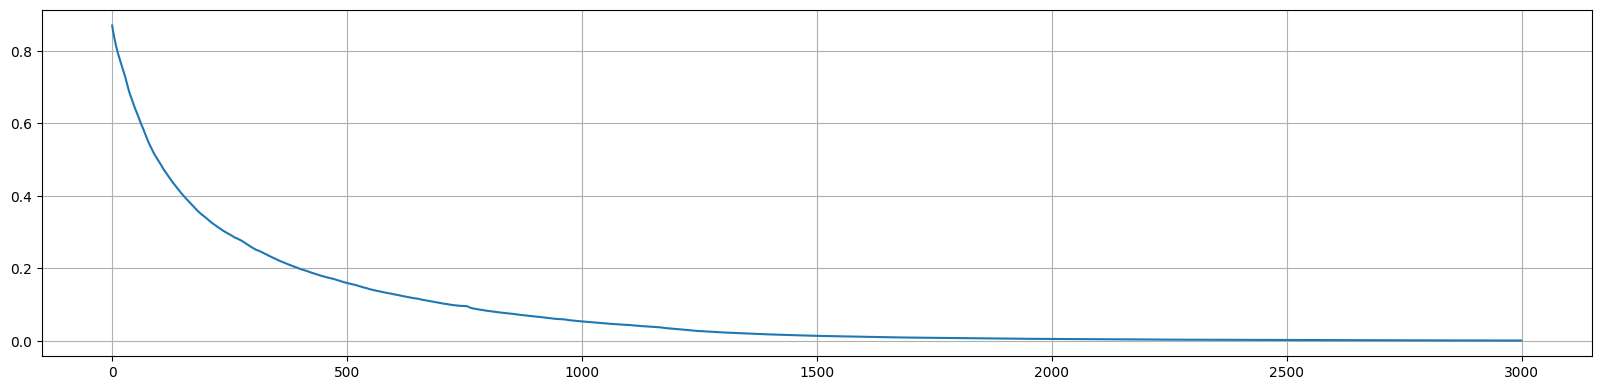

In [17]:
nn2.compile(optimizer='adam', loss='binary_crossentropy')
history2 = nn2.fit(X_tr2, y_tr2, batch_size=8, epochs=3000, verbose=0)
loss_history2 = pd.Series(name='loss', data=history2.history['loss'])
loss_history2.plot(figsize=figsize, grid=':');

* In our case, we need a large number of epochs since our dataset is tiny

## Evaluation

**Predictions are assumed to be probabilistic by default**

In [18]:
y_pred_p_tr2 = nn2.predict(X_tr2, verbose=0)
y_pred_p_ts2 = nn2.predict(X_ts2, verbose=0)
print(y_pred_p_tr2[:3])

[[9.9999297e-01]
 [9.9976641e-01]
 [3.2961456e-04]]


...Se we need to use rouding to get actual classes:

In [19]:
y_pred_tr2 = np.round(y_pred_p_tr2)
y_pred_ts2 = np.round(y_pred_p_ts2)
print(y_pred_tr2[:3])

[[1.]
 [1.]
 [0.]]


## Evaluation

**The, we can evaluate the NN classifier as usual**

Accuracy: 1.000 (training), 0.600 (test)


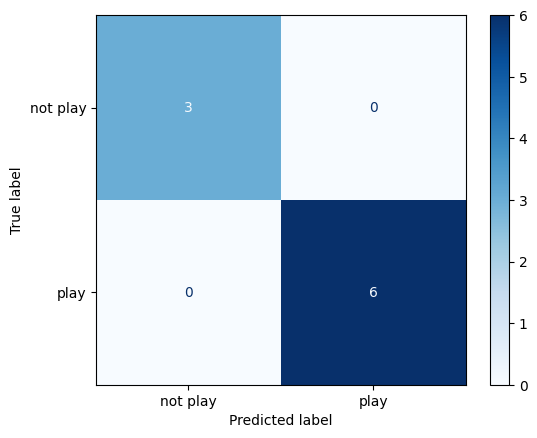

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
print(f'Accuracy: {accuracy_score(y_tr2, y_pred_tr2):.3f} (training), {accuracy_score(y_ts2, y_pred_ts2):.3f} (test)')
ConfusionMatrixDisplay.from_predictions(y_tr2, y_pred_tr2, display_labels=['not play', 'play'], cmap='Blues');

## Some Comments

**Some observations**

* Our NN results are slighly _worse_ than those of RFs
* Training takes longer than tree based models
* ...And NN are _very difficult_ to interpret

**So, what makes NNs special?**

Mostly, it's three things:

* Their ability to deal with raw input
* Their (relative) robustness w.r.t. overfitting
* Their (relative) smoothness and ability to interpolate data
* Their flexibility

**We will explore these aspects in deeper detail in the next notebook**